In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("/content/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [36]:
#N - ratio of Nitrogen content in soil
#P - ratio of Phosphorous content in soil
#K - ratio of Potassium content in soil

In [37]:
if df['N'].all()>90:
    print(df['N'])

In [38]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [39]:
x = df.drop('label', axis = 1)
y = df['label']

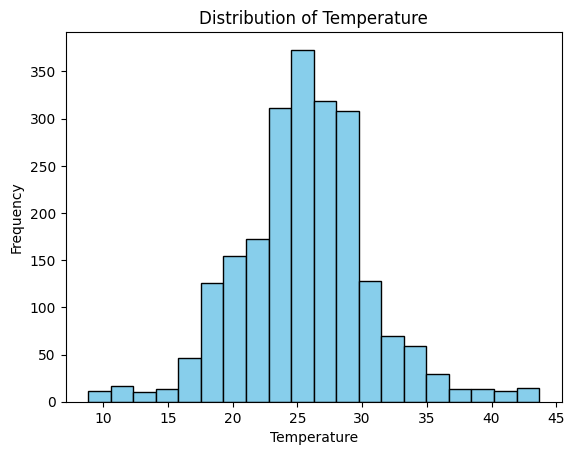

In [40]:
plt.hist(df['temperature'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()


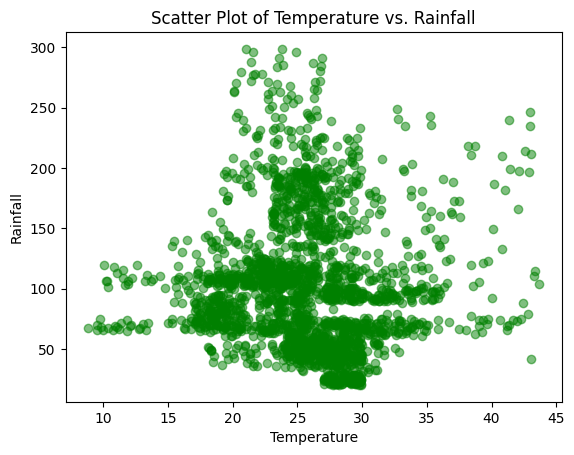

In [41]:
plt.scatter(df['temperature'], df['rainfall'], color='green', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.title('Scatter Plot of Temperature vs. Rainfall')
plt.show()


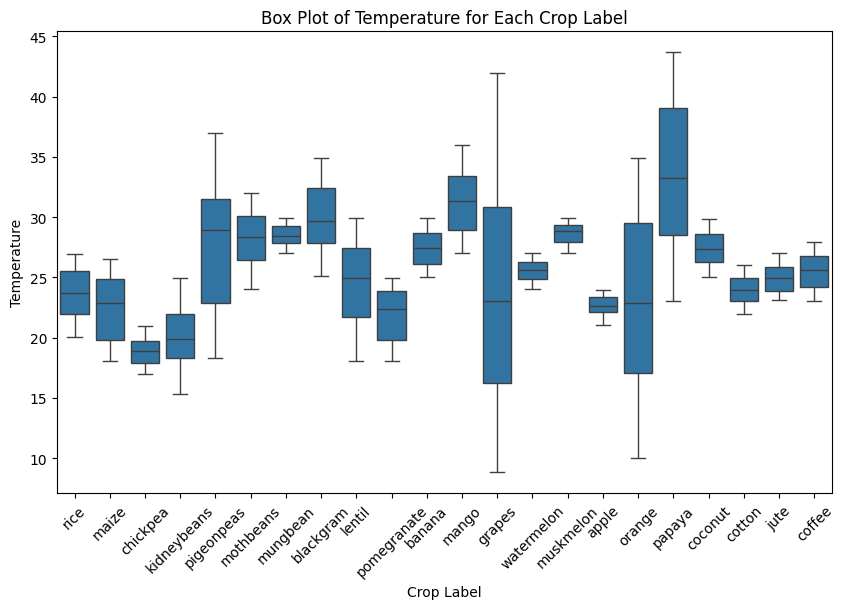

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='temperature', data=df)
plt.xlabel('Crop Label')
plt.ylabel('Temperature')
plt.title('Box Plot of Temperature for Each Crop Label')
plt.xticks(rotation=45)
plt.show()


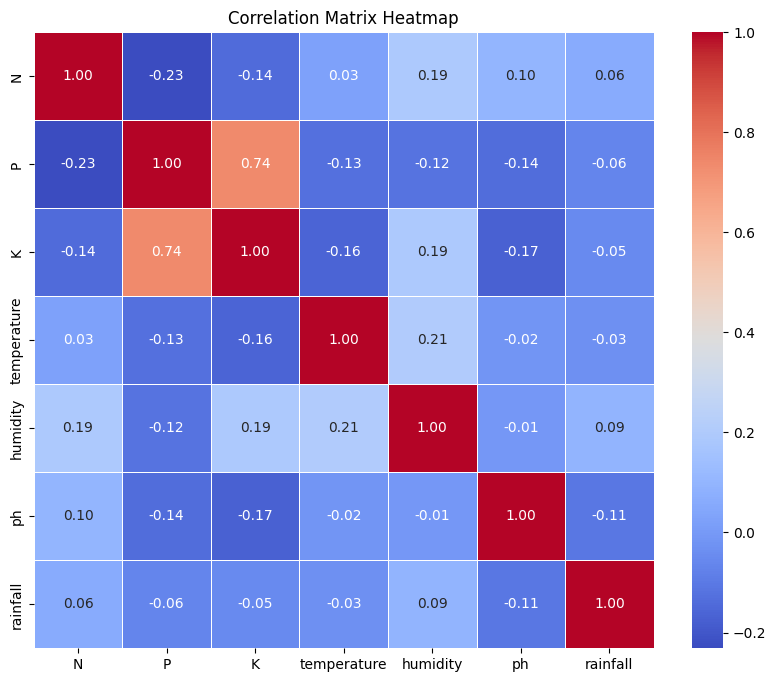

In [43]:
# Example preprocessing steps
# Assuming 'df' is your DataFrame

# Drop non-numeric columns or columns that are not relevant for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix for the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


<ipython-input-44-c36e625f39fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set3')


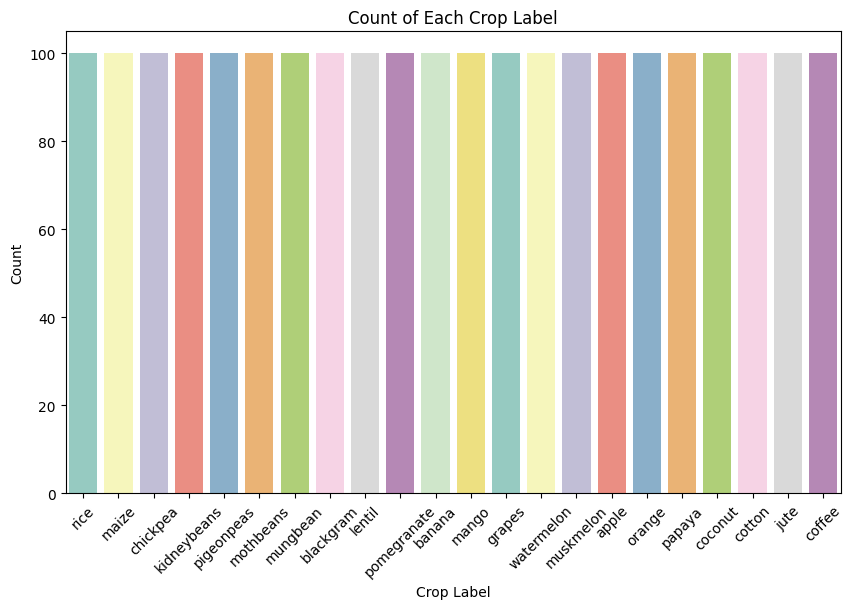

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, palette='Set3')
plt.xlabel('Crop Label')
plt.ylabel('Count')
plt.title('Count of Each Crop Label')
plt.xticks(rotation=45)
plt.show()


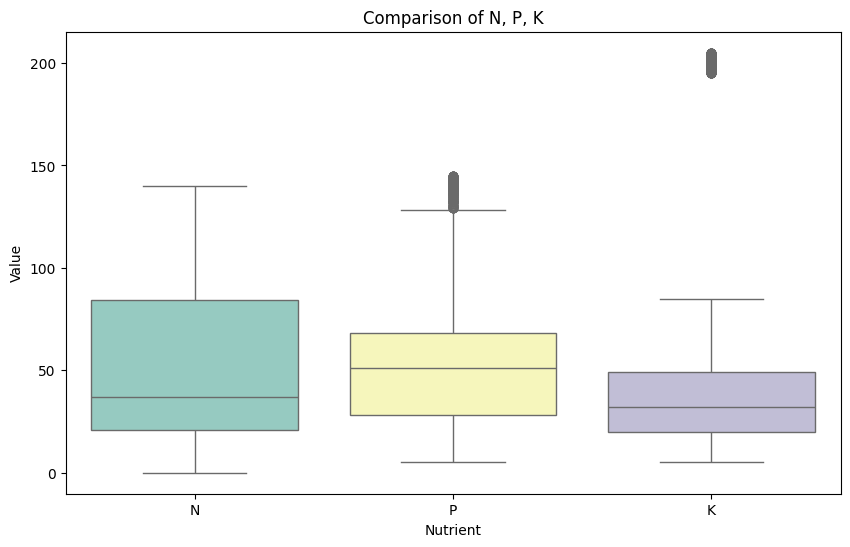

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['N', 'P', 'K']], palette='Set3')
plt.title('Comparison of N, P, K')
plt.xlabel('Nutrient')
plt.ylabel('Value')
plt.show()

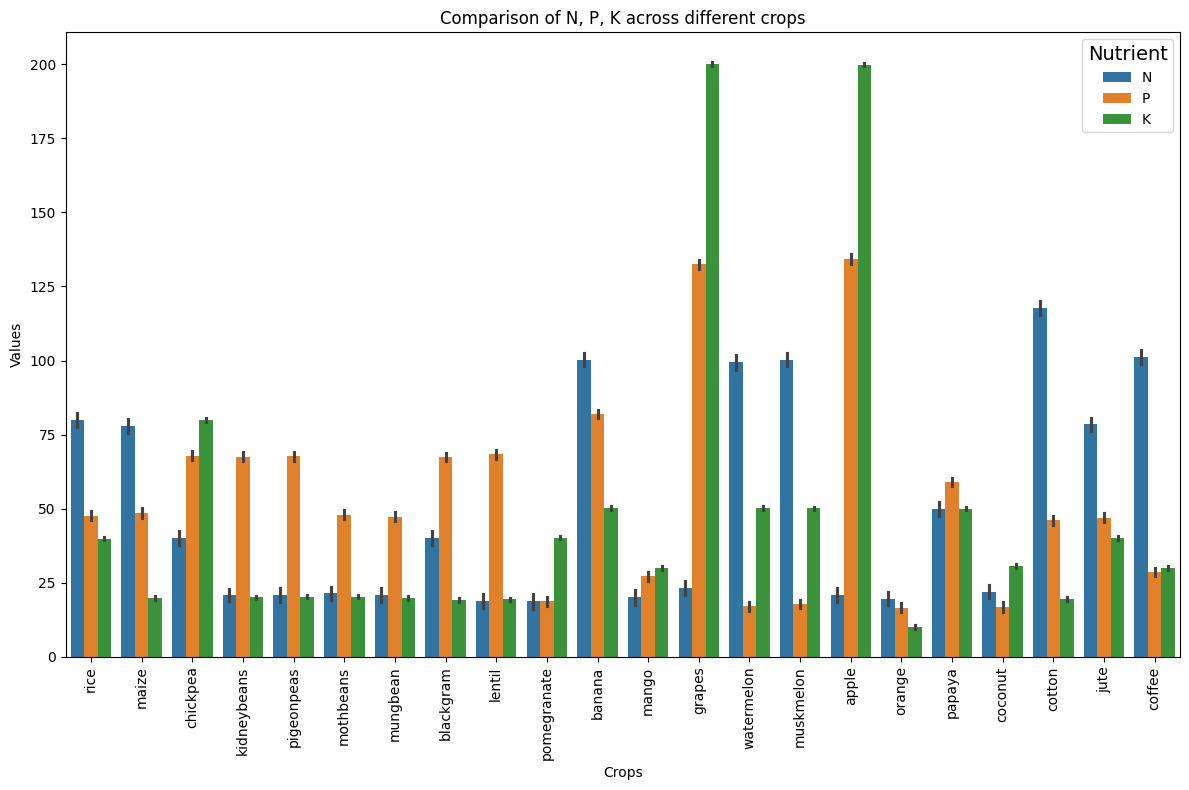

In [46]:
dfm = df.melt(id_vars=['label'], value_vars=['N', 'P', 'K'], var_name='Nutrient', value_name='Value')

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=dfm, x='label', y='Value', hue='Nutrient', dodge=True)
plt.xlabel('Crops')
plt.ylabel('Values')
plt.title('Comparison of N, P, K across different crops')
plt.xticks(rotation=90)
plt.legend(title='Nutrient', title_fontsize='14')
plt.tight_layout()
plt.show()

In [47]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [48]:
df.size


17600

In [49]:
df.shape

(2200, 8)

In [50]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [51]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Seperating features and target label

In [52]:
acc=[]
model=[]

In [53]:
features=df[['N','P','K','temperature','humidity','ph','rainfall']]
target=df['label']
labels=df['label']

In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [55]:
target_encoded = label_encoder.fit_transform(target)

In [56]:
target_encoded

array([20, 20, 20, ...,  5,  5,  5])

In [57]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(features,target_encoded,test_size=0.2,random_state=2)

Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

DecisionTree=DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values=DecisionTree.predict(Xtest)
x=metrics.accuracy_score(Ytest,predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's accuracy is :",x*100)



Decision Tree's accuracy is : 90.0


In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
score=cross_val_score(DecisionTree,features,target,cv=5)

score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

XGBoost

In [61]:
from xgboost import XGBClassifier


XB=XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values=XB.predict(Xtest)

x=metrics.accuracy_score(Ytest ,predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ",x*100,"%")

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  99.0909090909091 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00     

<ipython-input-62-285168b3da3b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

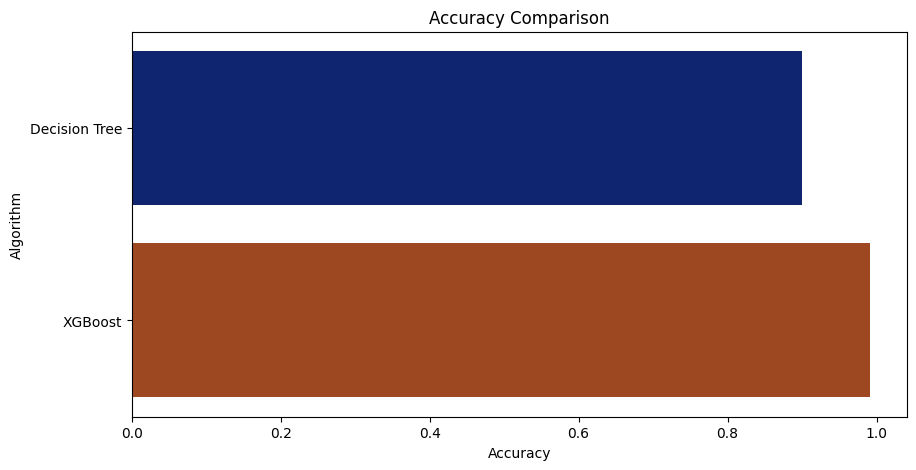

In [62]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [67]:
!pip install bz2file


  Preparing metadata (setup.py) ... done
  Created wheel for bz2file: filename=bz2file-0.98-py3-none-any.whl size=6868 sha256=b1cbe9645a398b51f76f0dd2fcbc999e5f0b2a01df6134ce1dcd2f01771339d2
  Stored in directory: /root/.cache/pip/wheels/69/ee/f7/6fccd10cb65421ba2da64fa6caf8ee7fbae0059884af8c8587
Successfully built bz2file


In [68]:
import bz2file as bz2
import pickle

In [69]:
def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    pickle.dump(data, f)


In [70]:
compressed_pickle('XB',XB)

In [71]:
def decompress_pickle(file):
  data = bz2.BZ2File(file, 'rb')
  data = pickle.load(data)
  return data



In [72]:

model = decompress_pickle('XB.pbz2')

In [74]:
model.predict([[107	,34	,32	,26.774637	,66.413269	,6.780064	,177.774507]])

array([5])

In [77]:
decoded_labels = label_encoder.inverse_transform([5])
decoded_labels

array(['coffee'], dtype=object)